# **ข้อ 0** 
เขียนโปรแกรมหาค่าสูงสุดในลิสต์ 
ส่วนตัวใช้ insertion sorting algorithm

In [ ]:
# ข้อ 0
def max_valus_with_insertion_sort(values_list): 
  for i in range(len(values_list)):
      checking_value = values_list[i]

      while i > 0 and values_list[i - 1] > checking_value: # ตัวที่ i-1 ไปเทียบกับ checking_value จากนั้น เอา i-2 ไปเช็ค จนกระทั่ง i = 0 (ตัวแรก)
          values_list[i] = values_list[i - 1] # สลับค่าน้อยเป็นค่าที่มากกว่า
          i = i - 1 # ขยับไป ตัวก่อนหน้า

      values_list[i] = checking_value # assign ค่าตัว แรก เพราะ pos = 0 ถึงออกจาก while loop
  print(values_list)
  return values_list[len(values_list)-1]

In [ ]:
import numpy as np
# สร้าง list แบบสุ่ม
values = np.random.randint(0,10,(1,10))
values_list2D = values.tolist()
values_list = values_list2D[0]
values_list

In [ ]:
max_valus_with_insertion_sort(values_list)

# **ข้อ 1** 
เขียน 8 puzzle ส่วนตัวใช้ A* *algorithm*

In [ ]:
# ข้อ 1
import copy
import random 

def win(puzzle, goal): # ถูกแล้วหรือยัง
  return goal == puzzle # ถ้าถูก return True

def find(puzzle,t): # หาตำแหน่งของค่า t ใน puzzle
    for i in range(len(puzzle)):
      for j in range(len(puzzle[i])):
        if t == puzzle[i][j]:
          return i,j

def fScore(puzzle,goal): # คำนวณ f score จาก g score () + h score
  count = 0
  for i in range(len(puzzle)):
    for j in range(len(puzzle[i])):
      if puzzle[i][j] == 0:
        continue
      if puzzle[i][j] != goal[i][j]: # h score
        count += 1  
      k,l = find(goal,puzzle[i][j])
      count += abs(k-i) + abs(l-j) # g score
  return count

def genOp(puzzle): # หาโอกาสที่ 0 จะเคลื่อนที่ไปได้ทั้งหมด 
  ops = []
  i,j = find(puzzle,0)
  for p in [(-1,0),(+1,0),(0,-1),(0,+1)]:
    if not ((i+p[0] > 2) or (i+p[0] < 0) or (j+p[1] > 2) or (j+p[1] < 0)):
      ops.append([i+p[0],j+p[1]])
  return ops

def swap0(puzzles,pos):
  puzzle = copy.deepcopy(puzzles)
  i,j = find(puzzle,0)
  puzzle[i][j] = puzzle[pos[0]][pos[1]]
  puzzle[pos[0]][pos[1]] = 0
  return puzzle

def solve(puzzles, goal):
  total_list = []
  puzzle = copy.deepcopy(puzzles)
  last = find(puzzle,0)
  while not win(puzzle,goal):
    ops = genOp(puzzle)
    for i in range(len(ops)):
      if list(ops[i]) != list(last):
        ops.append(ops[i])
    less = swap0(puzzle, ops[0])
    for i,v in enumerate(ops):
      if fScore(swap0(puzzle, v),goal) < fScore(less,goal):
        less = swap0(puzzle, v)
    last = find(puzzle,0)
    puzzle = less
    total_list.append(puzzle)
  return total_list


In [ ]:
goal = [[1,2,3],
        [4,5,6],
        [7,8,0]]
        
pb = [[4,1,2],
        [7,0,3],
        [8,5,6]]
print("Goal")
for i in goal:
  print(i)
print("-----------")
print("Problem")
for i in pb:
  print(i)
print("-----------\n")
total_list = solve(pb, goal)

for i in total_list:
  print("    |")
  print("    V")
  for j in i:
    print(j)


# **ข้อ 2**



เขียน depth-first search พร้อม อะนิเมชั่น

In [ ]:
# another solution of ข้อ 1 ใช้ simpleai

from __future__ import print_function
from simpleai.search import astar, SearchProblem
from simpleai.search.viewers import WebViewer


GOAL = '''1-2-3
4-5-6
7-8-e'''

INITIAL = '''4-1-2
7-e-3
8-5-6'''

def list_to_string(list_):
    return '\n'.join(['-'.join(row) for row in list_])


def string_to_list(string_):
    return [row.split('-') for row in string_.split('\n')]


def find_location(rows, element_to_find):
    for ir, row in enumerate(rows):
        for ic, element in enumerate(row):
            if element == element_to_find:
                return ir, ic

goal_positions = {}
rows_goal = string_to_list(GOAL)
for number in '12345678e':
    goal_positions[number] = find_location(rows_goal, number)

In [ ]:
class EigthPuzzleProblem(SearchProblem):
    def actions(self, state):
        rows = string_to_list(state)
        row_e, col_e = find_location(rows, 'e')

        actions = []
        if row_e > 0:
            actions.append(rows[row_e - 1][col_e])
        if row_e < 2:
            actions.append(rows[row_e + 1][col_e])
        if col_e > 0:
            actions.append(rows[row_e][col_e - 1])
        if col_e < 2:
            actions.append(rows[row_e][col_e + 1])

        return actions

    def result(self, state, action):
        rows = string_to_list(state)
        row_e, col_e = find_location(rows, 'e')
        row_n, col_n = find_location(rows, action)

        rows[row_e][col_e], rows[row_n][col_n] = rows[row_n][col_n], rows[row_e][col_e]

        return list_to_string(rows)

    def is_goal(self, state):
        '''Returns true if a state is the goal state.'''
        return state == GOAL

    def cost(self, state1, action, state2):
        '''Returns the cost of performing an action. No useful on this problem, i
           but needed.
        '''
        return 1

    def heuristic(self, state):
        '''Returns an *estimation* of the distance from a state to the goal.
           We are using the manhattan distance.
        '''
        rows = string_to_list(state)

        distance = 0

        for number in '12345678e':
            row_n, col_n = find_location(rows, number)
            row_n_goal, col_n_goal = goal_positions[number]

            distance += abs(row_n - row_n_goal) + abs(col_n - col_n_goal)

        return distance

In [ ]:
from google.colab.output import  serve_kernel_port_as_window
serve_kernel_port_as_window(8000)

In [ ]:
# ข้อ 2 
# Animation of DFS
result = astar(EigthPuzzleProblem(INITIAL), viewer=WebViewer())

# **ข้อ 3** 
เลือกข้อมูล 1 อย่างจาก 
     Kaggle มาทำการ visualize
     ข้อมูลในรูปแบบกราฟต่างๆ

In [ ]:
!pip install -U kora

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from kora import kaggle

In [ ]:
kaggle.search('cat')

,ref,title,size,lastUpdated,downloadCount
0,crawford/cat-dataset,Cat Dataset,4GB,2018-02-16 23:41:25,11333
1,tongpython/cat-and-dog,Cat and Dog,218MB,2018-04-26 10:56:50,23611
2,rmisra/news-category-dataset,News Category Dataset,25MB,2018-12-02 04:09:45,15212
3,harriken/bias-media-cat,Bias Media CAT,17MB,2017-10-27 22:46:25,348
4,mrisdal/open-exoplanet-catalogue,Open Exoplanet Catalogue,123KB,2017-06-08 19:59:22,2805
5,mkechinov/ecommerce-behavior-data-from-multi-c...,eCommerce behavior data from multi category store,4GB,2019-12-09 20:43:39,4397
6,shayanfazeli/heartbeat,ECG Heartbeat Categorization Dataset,99MB,2018-05-31 18:47:34,16617
7,mmoreaux/audio-cats-and-dogs,Audio Cats and Dogs,97MB,2017-10-05 09:40:26,5187
8,chetankv/dogs-cats-images,Dogs & Cats Images,435MB,2018-04-19 18:20:08,12862
9,mriganksingh/cat-images-dataset,Cat images Dataset,3MB,2019-04-13 20:24:18,972


In [ ]:
kaggle.ls('harriken/bias-media-cat')  # list all files

,name,size,creationDate
0,Requerimiento-Rajoy-Generalitat-11oct2017.pdf,632KB,2017-10-27 22:46:25
1,all2.csv,19MB,2017-10-27 22:46:25
2,all.csv,17MB,2017-10-27 22:46:25
3,news_on_catalonia_oct_11_2017.csv,279KB,2017-10-27 22:46:25
4,all3.csv,35MB,2017-10-27 22:46:25
5,news_on_catalonia_oct_11_2017_original.xlsx,73KB,2017-10-27 22:46:25


In [ ]:
kaggle.download('harriken/bias-media-cat/all.csv') 

 30% 5.00M/16.7M [00:00<00:00, 52.0MB/s]
100% 16.7M/16.7M [00:00<00:00, 81.2MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('all.csv')

In [ ]:
df.sample(5)

,screen_name,name,twitter_id,description,year,month,date,time,tweet_id,tweet
45836,elmundotoday,El Mundo Today,38381308,La actualidad del mañana.,2017,7,25,11.58,889817160494837760,“Juego de Tronos” 7×2: Bajo la tormenta de spo...
32396,CNN,CNN,759251,It’s our job to #GoThere & tell the most diffi...,2017,10,16,5.20,919795054440566784,British actor Lysette Anthony accuses Weinstei...
53408,LaVanguardia,La Vanguardia,74453123,Twitter oficial de 'La Vanguardia' Información...,2017,10,25,12.41,923167539558887424,Societat Civil responde al vídeo de ‘Help Cata...
2051,BBCBreaking,BBC Breaking News,5402612,Breaking news alerts and updates from the BBC....,2017,2,17,12.31,832568036922109952,"The former leader of Hong Kong, Donald Tsang, ..."
53615,LaVanguardia,La Vanguardia,74453123,Twitter oficial de 'La Vanguardia' Información...,2017,10,24,23.39,922970749572284416,Diez documentales imperdibles del Festival In-...


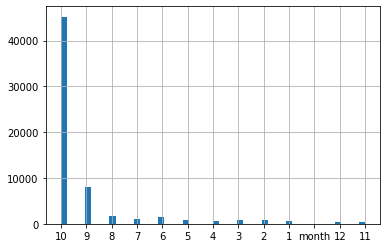

In [ ]:
df['month'].hist(bins=50)
plt.show()